SISMOLOGIA

Grupo # 1

- Yareth Burbano
- Juan Diego Florez Vera
- Ayda Milena Bernal
- Manuela Sánchez
- Marcela Toloza
- Camilo Garcia

## 1.1. Fundamentos

Los sismos, también conocidos como terremotos, son eventos sísmicos que liberan energía en forma de ondas que viajan a través de la Tierra. Esta energía proviene del movimiento de las placas tectónicas, las grandes masas de roca que forman la corteza terrestre.

### 1.1.1. Como se Producen los Sismos

Las placas tectónicas se encuentran en constante movimiento, deslizándose unas sobre otras. Cuando las placas se atascan y acumulan tensión, esta tensión finalmente se libera de forma abrupta, provocando el movimiento repentino de las placas. Este movimiento genera ondas sísmicas que se transmiten por la Tierra, causando vibraciones en la superficie y produciendo los efectos que conocemos como un sismo.

### 1.1.2. Los Tipos de Ondas Sísmicas

Existen diferentes tipos de ondas sísmicas que se generan durante un sismo. Las **ondas P** son las primeras en llegar a la superficie y son las que causan la compresión y descompresión del suelo. Las **ondas S** son más lentas que las ondas P y causan el movimiento de lado a lado del suelo. Las **ondas L** son las más lentas y las que producen el movimiento ondulatorio de la superficie

### 1.1.3. Magnitud e Intensidad

La magnitud de un sismo se mide en la escala de Richter, una escala logarítmica que representa la cantidad de energía liberada por el evento. La intensidad de un sismo, por otro lado, se refiere a la fuerza con la que se siente el temblor en un lugar determinado y se mide en la escala de Mercalli.

## 1.2. Dataset

Los datos de estudio fueron adquiridos de la paltaforma Kaggle, en la cual la The National Earthquake Information Center (NEIC) determina la localizacion y tamaño de todos los simosmos significantes al rededor del mundo.


# escenario

No hay establecidos patrones que permitan definir la producción de sismos en un tiempo determinado.<br>

# Background



¿Qué caracteristicas permiten establecer los patrones con que se producen los sismos en un periodo determinado de tiempo?

In [5]:
!pip install astrotools

In [6]:
!pip install kneed

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy.time import Time
import astrotools
import folium
from kneed import KneeLocator
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.linear_model import Ridge

que caracteristicas permiten establecer la probabilidad de que se produzca un sismo en un periodo determinado de tiempo?

In [8]:
# cargar los datos
df=pd.read_csv("Sismos_significativos_Global.csv")

## 1.3. Descripcion Preliminar de los Datos

In [9]:
#Tamaño
print(df.shape)

(23412, 21)


In [10]:
# información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [11]:
#Vista Preliminar
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [12]:
#Resumen estadistico preliminar
df.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

In [64]:
# Porcentaje de datos faltantes
missing_percent = df.isna().sum() / len(df) * 100
print(missing_percent)

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64


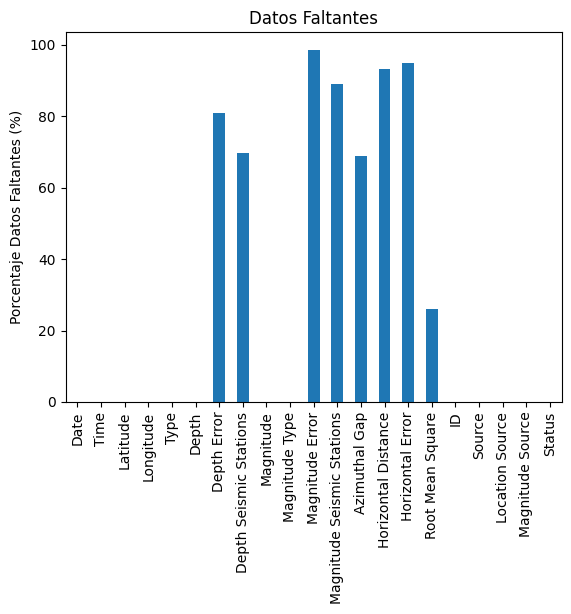

In [65]:
#Graficar porcentajes de datos faltantes por variable
missing_percent.plot(kind='bar')
plt.title('Datos Faltantes')
plt.xlabel('index')
plt.ylabel('0')
plt.xlabel('')
plt.ylabel('Porcentaje Datos Faltantes (%)')
plt.show()

Las variables de la base de datos de sismos significativos que presentan porcentajes altos de datos faltantes están asociadas con valores medios de error durante la captura de los datos.

Esto sugiere que la captura de datos de estas variables puede haber sido menos precisa o más propensa a errores en comparación con otras variables con menor cantidad de datos faltantes. Esta situación puede afectar la calidad y la integridad de los datos, lo que a su vez puede influir en la fiabilidad de los análisis y conclusiones derivados de esta base de datos.

## 1.3. Tipos de Datos

In [13]:
# para ver que tipo de variable es
info = df.dtypes
res = dict((key, "numérica") if value == "float64" else (key, "categórica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

columna        tipo
0                         Date  categórica
1                         Time  categórica
2                     Latitude    numérica
3                    Longitude    numérica
4                         Type  categórica
5                        Depth    numérica
6                  Depth Error    numérica
7       Depth Seismic Stations    numérica
8                    Magnitude    numérica
9               Magnitude Type  categórica
10             Magnitude Error    numérica
11  Magnitude Seismic Stations    numérica
12               Azimuthal Gap    numérica
13         Horizontal Distance    numérica
14            Horizontal Error    numérica
15            Root Mean Square    numérica
16                          ID  categórica
17                      Source  categórica
18             Location Source  categórica
19            Magnitude Source  categórica
20                      Status  categórica

# EDA (exploratory data analysis)

Vamos a escoger las variables de interes y las guardamos en un lista llamada variables_a_utilizar

De acuerdo con la descripcion de los datos y datos faltandes del Dataset se establecen las siguiente variables para el analisis.

* Date
* Time
* Latitude
* Longitude
* Type
* Depth


In [87]:
variables_a_utilizar=["Date","Time","Latitude","Longitude","Type","Depth","Magnitude","Magnitude Seismic Stations","Depth Seismic Stations"]
df_filtrado=df[variables_a_utilizar]
df_filtrado.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

   Magnitude Seismic Stations  Depth Seismic Stations  
0                         NaN                     NaN  
1                         NaN                     NaN  
2                         NaN                     NaN  
3                         NaN                     NaN  
4                         NaN                     NaN

vamos a comprobar que la columna "Date" esté en el formato dd/mm/AA

In [88]:
# esto es para mirar los datos que están defectuosos
indice=0
filas_a_eliminar=[]
for i in df_filtrado["Date"]:
  if(not(i[2]=="/" and i[5]=="/")):
    print(f"el dato con el indice {indice} está defectuosos")
    filas_a_eliminar.append(indice)
  indice+=1

el dato con el indice 3378 está defectuosos
el dato con el indice 7512 está defectuosos
el dato con el indice 20650 está defectuosos


In [89]:
df_filtrado=df_filtrado.drop(filas_a_eliminar,axis=0) #eliminando datos defectuosos
df_filtrado.reset_index(inplace=True, drop=True) #reajustar los indices de los datos del dataframe df_filtrado

In [90]:
# comprobar la eliminación de datos defectuosos
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23409 non-null  object 
 1   Time                        23409 non-null  object 
 2   Latitude                    23409 non-null  float64
 3   Longitude                   23409 non-null  float64
 4   Type                        23409 non-null  object 
 5   Depth                       23409 non-null  float64
 6   Magnitude                   23409 non-null  float64
 7   Magnitude Seismic Stations  2564 non-null   float64
 8   Depth Seismic Stations      7096 non-null   float64
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [91]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numérica") if value == "float64" else (key, "categórica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

columna        tipo
0                        Date  categórica
1                        Time  categórica
2                    Latitude    numérica
3                   Longitude    numérica
4                        Type  categórica
5                       Depth    numérica
6                   Magnitude    numérica
7  Magnitude Seismic Stations    numérica
8      Depth Seismic Stations    numérica

## 1.4. Analisis Univariable

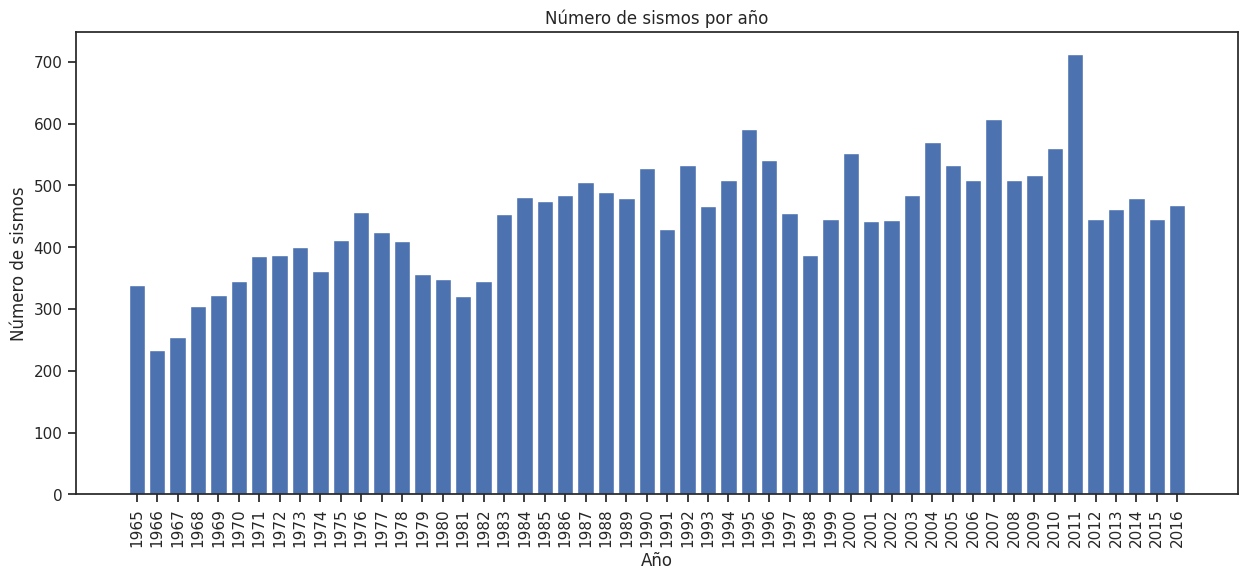

In [92]:
def contar_sismos_por_año(df, año):
  """
  Cuenta el número de sismos en un año determinado.

  Args:
      df: DataFrame con los datos de los sismos.
      año: Año a contar los sismos.

  Returns:
      int: Número de sismos en el año especificado.
  """

  # Filtrar el DataFrame por año
  df_año = df[df["Date"].str.contains(str(año))]

  # Contar el número de filas en el DataFrame filtrado
  num_sismos = len(df_año)

  return num_sismos

# Obtener los años únicos en el DataFrame
años_unicos = df_filtrado["Date"].str.split("/", expand=True)[2].unique()

# Crear un diccionario para almacenar el número de sismos por año
sismos_por_año = {}

# Recorrer los años únicos y contar los sismos en cada año
for año in años_unicos:
  sismos_por_año[año] = contar_sismos_por_año(df_filtrado, año)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_año.keys(), sismos_por_año.values())
plt.xlabel("Año")
plt.tick_params(axis="x",rotation=90)
plt.ylabel("Número de sismos")
plt.title("Número de sismos por año")
plt.show()


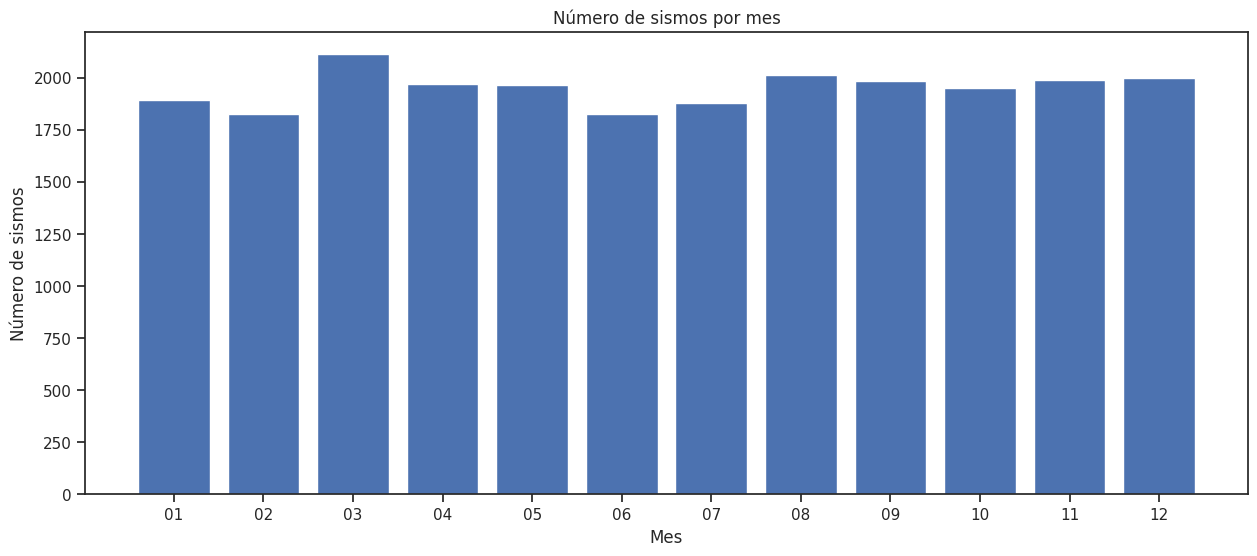

In [93]:

def contar_sismos_por_mes(df):
  """
  Cuenta el número de sismos en cada mes de todos los años.

  Args:
      df: DataFrame con los datos de los sismos.

  Returns:
      dict: Diccionario con los meses del año como claves y el número de sismos como valores.
  """

  # Obtener los meses únicos en el DataFrame
  meses_unicos = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Crear un diccionario para almacenar el número de sismos por mes
  sismos_por_mes = {}

  # Recorrer los meses únicos y contar los sismos en cada mes
  for mes in meses_unicos:
    sismos_por_mes[mes] = len(df_filtrado[df_filtrado["Date"].str.startswith(mes)])

  return sismos_por_mes

# Obtener el diccionario con los sismos por mes
sismos_por_mes = contar_sismos_por_mes(df_filtrado)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_mes.keys(), sismos_por_mes.values())
plt.xlabel("Mes")
plt.ylabel("Número de sismos")
plt.title("Número de sismos por mes")
plt.show()

#Clasificación de los sismos

* Sismos leves:

 * Magnitud Richter menor o igual a 5.0

* Sismos moderados:

  * Magnitud Richter entre 5.1 y 6.0

* Sismos fuertes:
  * Magnitud Richter entre 6.1 y 7.0

* Sismos muy fuertes:
  * Magnitud Richter mayor a 7.0

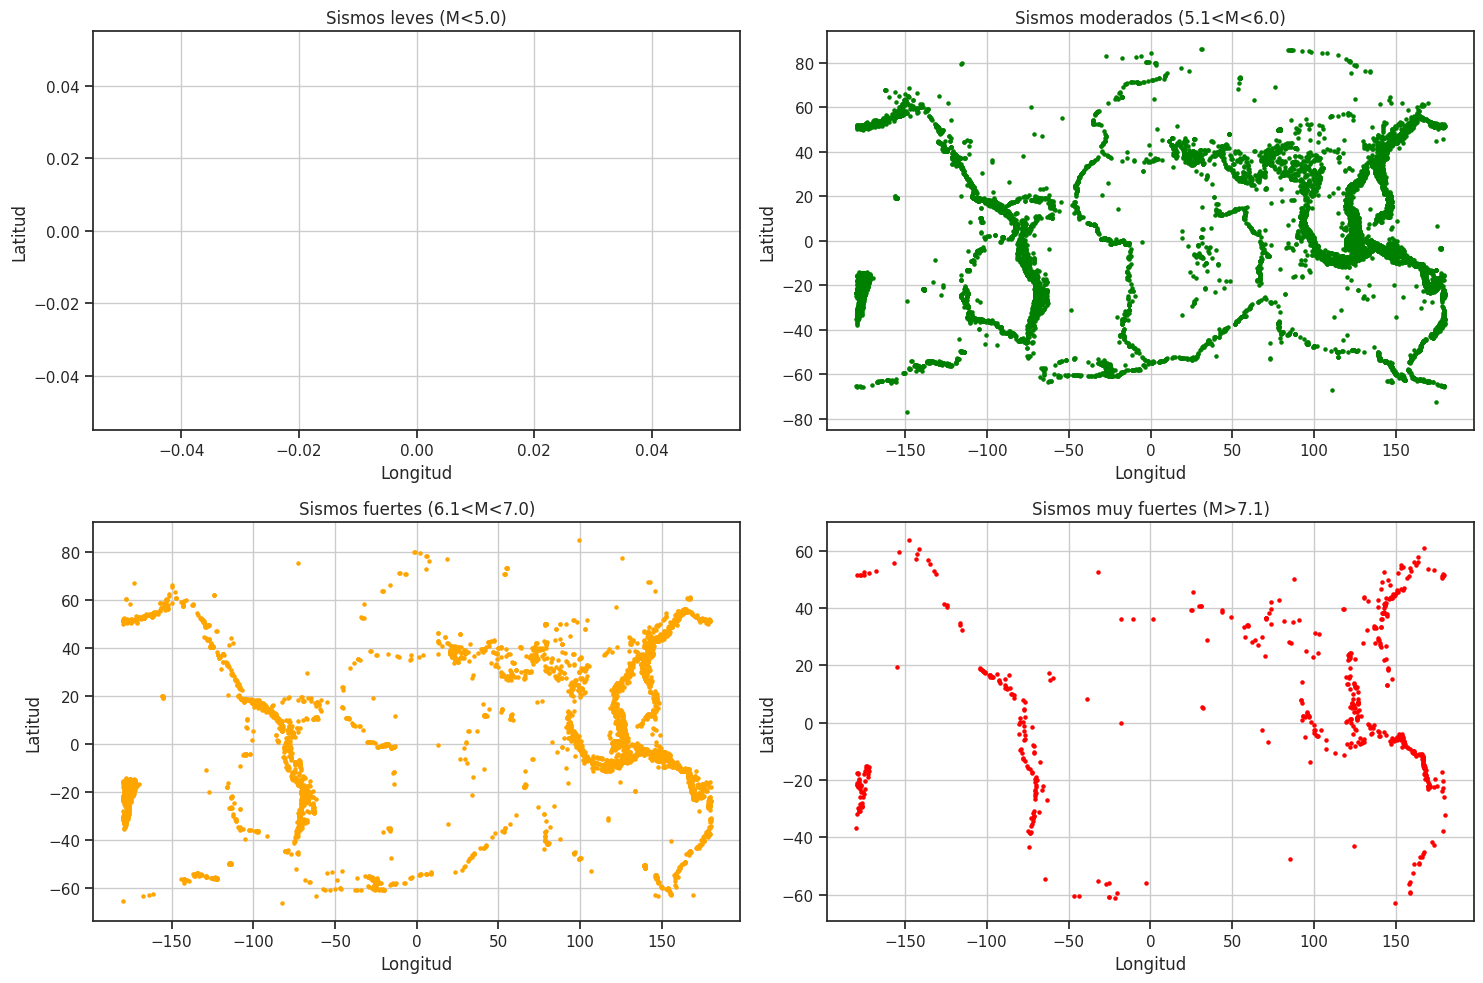

In [94]:
# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Filtrar los datos por magnitud
sismos_leves = df_filtrado[df_filtrado["Magnitude"] <= 5.0]
sismos_moderados = df_filtrado[(df_filtrado["Magnitude"] > 5.0) & (df_filtrado["Magnitude"] <= 6.0)]
sismos_fuertes = df_filtrado[(df_filtrado["Magnitude"] > 6.0) & (df_filtrado["Magnitude"] <= 7.0)]
sismos_muy_fuertes = df_filtrado[df_filtrado["Magnitude"] > 7.0]

# Graficar los puntos de latitud y longitud para cada tipo de sismo
axes[0, 0].scatter(sismos_leves["Longitude"], sismos_leves["Latitude"],color="blue",s=5)
axes[0, 0].set_title("Sismos leves (M<5.0)")
axes[0,0].set_xlabel("Longitud")
axes[0,0].set_ylabel("Latitud")
axes[0,0].grid()

axes[0, 1].scatter(sismos_moderados["Longitude"], sismos_moderados["Latitude"], color="green",s=5)
axes[0, 1].set_title("Sismos moderados (5.1<M<6.0)")
axes[0,1].set_xlabel("Longitud")
axes[0,1].set_ylabel("Latitud")
axes[0,1].grid()

axes[1, 0].scatter(sismos_fuertes["Longitude"], sismos_fuertes["Latitude"], color="orange",s=5)
axes[1, 0].set_title("Sismos fuertes (6.1<M<7.0)")
axes[1,0].set_xlabel("Longitud")
axes[1,0].set_ylabel("Latitud")
axes[1,0].grid()

axes[1, 1].scatter(sismos_muy_fuertes["Longitude"], sismos_muy_fuertes["Latitude"], color="red",s=5)
axes[1, 1].set_title("Sismos muy fuertes (M>7.1)")
axes[1,1].set_xlabel("Longitud")
axes[1,1].set_ylabel("Latitud")
axes[1,1].grid()

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura

plt.show()


In [95]:
# Crear un nuevo DataFrame con el número de sismos por tipo
sismos_por_tipo = pd.DataFrame({
    "Tipo de sismo": ["Leves", "Moderados", "Fuertes", "Muy fuertes","Total"],
    "Número de sismos": [
        len(sismos_leves),
        len(sismos_moderados),
        len(sismos_fuertes),
        len(sismos_muy_fuertes),
        len(sismos_leves)+len(sismos_moderados)+len(sismos_fuertes)+len(sismos_muy_fuertes),
    ],
})

# Mostrar el DataFrame
sismos_por_tipo

Tipo de sismo  Número de sismos
0         Leves                 0
1     Moderados             17635
2       Fuertes              5204
3   Muy fuertes               570
4         Total             23409

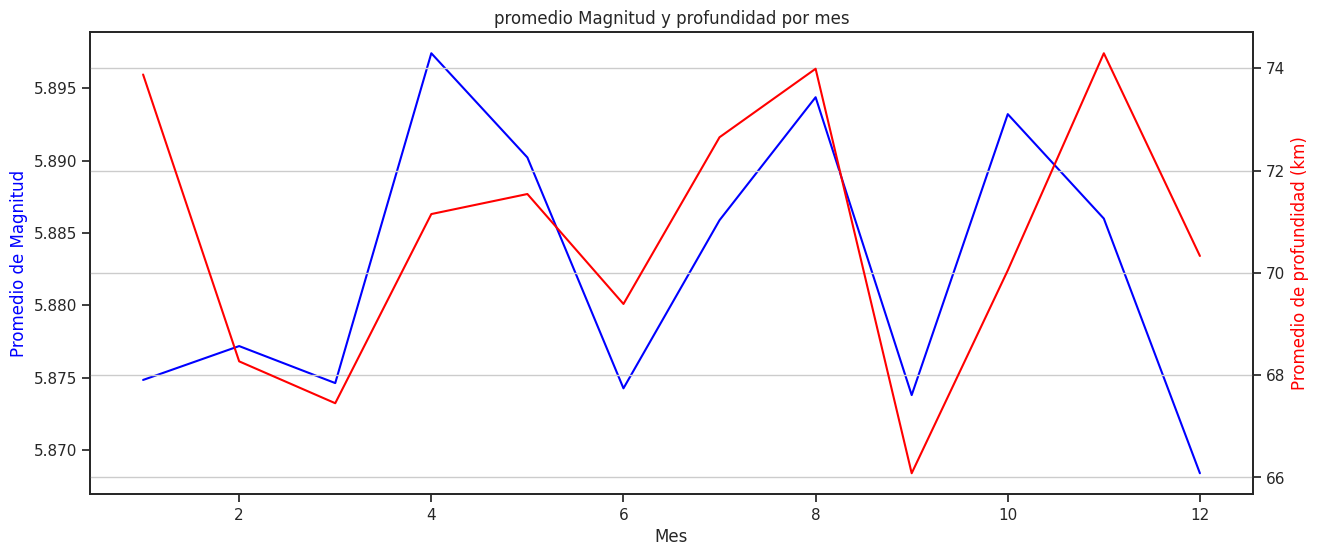

In [96]:
def calculate_monthly_averages(df):
  """
  Calculates the average magnitude and depth for each month.

  Args:
      df: DataFrame with the earthquake data.

  Returns:
      tuple: Two lists, one containing the average magnitudes for each month and one containing the average depths for each month.
  """

  # Initialize lists to store the averages
  average_magnitudes = []
  average_depths = []

  # Get unique months
  months = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Loop through each month
  for month in months:
    # Filter the DataFrame by month
    df_month = df_filtrado[df_filtrado["Date"].str.startswith(month)]

    # Calculate the average magnitude and depth for the month
    average_magnitude = df_month["Magnitude"].mean()
    average_depth = df_month["Depth"].mean()

    # Add the averages to the lists
    average_magnitudes.append(average_magnitude)
    average_depths.append(average_depth)

  return average_magnitudes, average_depths

# Calculate the monthly averages
average_magnitudes, average_depths = calculate_monthly_averages(df_filtrado)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the average magnitudes with the primary axis
ax1.plot(range(1, 13), average_magnitudes, label="Average Magnitude", color="blue")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Promedio de Magnitud", color="blue")

# Create a secondary axis for the average depths
ax2 = ax1.twinx()

# Plot the average depths with the secondary axis
ax2.plot(range(1, 13), average_depths, label="Average Depth", color="red")
ax2.set_ylabel("Promedio de profundidad (km)", color="red")

# Set the title and show the legend
plt.title("promedio Magnitud y profundidad por mes")
plt.grid()
plt.show()


## 1.5. Transformación de Tipos de Variables

In [97]:
#escoger variables a utilizar del dataset

# vamos a serparar la hora de los minutos y segundos

"""
#forma alternativa
Time_horas=[]
for fecha in datos_de_la_matriz["Time"]:
  h=int(fecha[0:2])
  minu=int(fecha[3:5])
  seg=int(fecha[6:])
  Time_horas.append(h+minu/60+seg/3600)
"""
#convers
Time_horas=[int(fecha[0:2])+int(fecha[3:5])/60+int(fecha[6:])/3600 for fecha in df_filtrado["Time"]] #lista compresión

Date_J=[astrotools.coord.date_to_julian_day(int(fecha[6:]),int(fecha[0:2]),int(fecha[3:5])) for fecha in df_filtrado["Date"]]

df_filtrado["Date"]=Date_J
df_filtrado["Time"]=Time_horas
df_filtrado.head()

Date       Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  2438763  13.738333    19.246    145.616  Earthquake  131.6        6.0   
1  2438765  11.496944     1.863    127.352  Earthquake   80.0        5.8   
2  2438766  18.099444   -20.579   -173.972  Earthquake   20.0        6.2   
3  2438769  18.828611   -59.076    -23.557  Earthquake   15.0        5.8   
4  2438770  13.547222    11.938    126.427  Earthquake   15.0        5.8   

   Magnitude Seismic Stations  Depth Seismic Stations  
0                         NaN                     NaN  
1                         NaN                     NaN  
2                         NaN                     NaN  
3                         NaN                     NaN  
4                         NaN                     NaN

In [98]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numerica") if (value == "float64" or value=="int64") else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

columna        tipo
0                        Date    numerica
1                        Time    numerica
2                    Latitude    numerica
3                   Longitude    numerica
4                        Type  categorica
5                       Depth    numerica
6                   Magnitude    numerica
7  Magnitude Seismic Stations    numerica
8      Depth Seismic Stations    numerica

In [99]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23409 non-null  int64  
 1   Time                        23409 non-null  float64
 2   Latitude                    23409 non-null  float64
 3   Longitude                   23409 non-null  float64
 4   Type                        23409 non-null  object 
 5   Depth                       23409 non-null  float64
 6   Magnitude                   23409 non-null  float64
 7   Magnitude Seismic Stations  2564 non-null   float64
 8   Depth Seismic Stations      7096 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.6+ MB


In [100]:
df_filtrado.head()

Date       Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  2438763  13.738333    19.246    145.616  Earthquake  131.6        6.0   
1  2438765  11.496944     1.863    127.352  Earthquake   80.0        5.8   
2  2438766  18.099444   -20.579   -173.972  Earthquake   20.0        6.2   
3  2438769  18.828611   -59.076    -23.557  Earthquake   15.0        5.8   
4  2438770  13.547222    11.938    126.427  Earthquake   15.0        5.8   

   Magnitude Seismic Stations  Depth Seismic Stations  
0                         NaN                     NaN  
1                         NaN                     NaN  
2                         NaN                     NaN  
3                         NaN                     NaN  
4                         NaN                     NaN

## 1.6. CORRELACIÓN

In [105]:
# elegir los datos para la matriz de confusión
df_filtrado.dropna(inplace=True)
def CV_df(df):
    df_numerico = df.select_dtypes(include='number') #seleccionar las variables que son numericas
    CV = {columna : (df_numerico[columna].std() * 100) / df_numerico[columna].mean() for columna in df_numerico.columns}
    CV = pd.DataFrame([CV], columns=df_numerico.columns)
    return CV
CV_df(df_filtrado)

Date      Time    Latitude   Longitude       Depth  Magnitude  \
0  0.142544  55.81647  181.440642  250.508307  231.870318   5.313319   

   Magnitude Seismic Stations  Depth Seismic Stations  
0                   106.70574               80.487243

Text(0.5, 1.0, 'Matriz de Correlación')

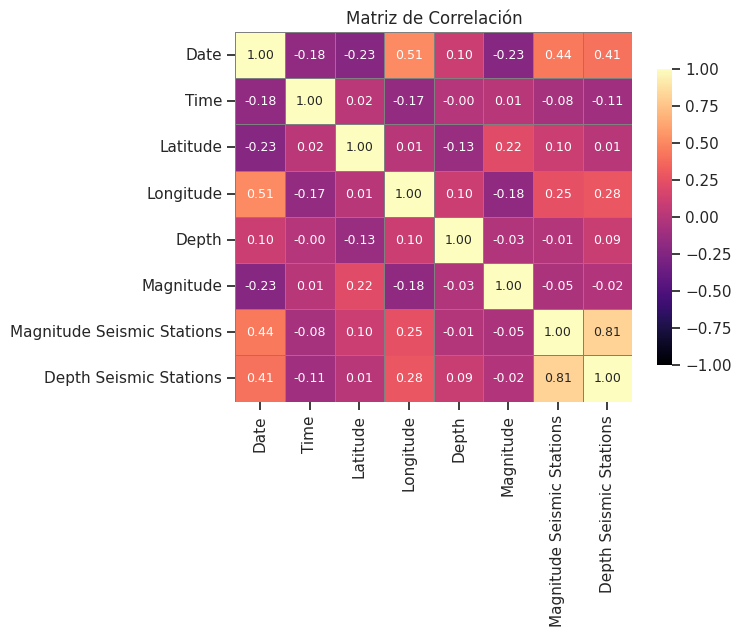

In [107]:
correlacion = df_filtrado.select_dtypes(include="number").corr()
sns.heatmap(data= correlacion,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            fmt=".2f",  # Formato de los números de correlación
            cmap="magma",  # Paleta de colores personalizada
            linewidths=0.5,  # Ancho de las líneas entre celdas
            linecolor='gray',  # Color de las líneas entre celdas
            annot_kws={"size": 9},  # Tamaño de los números de correlación
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación')

Matriz de correlación eliminando los datos nulos

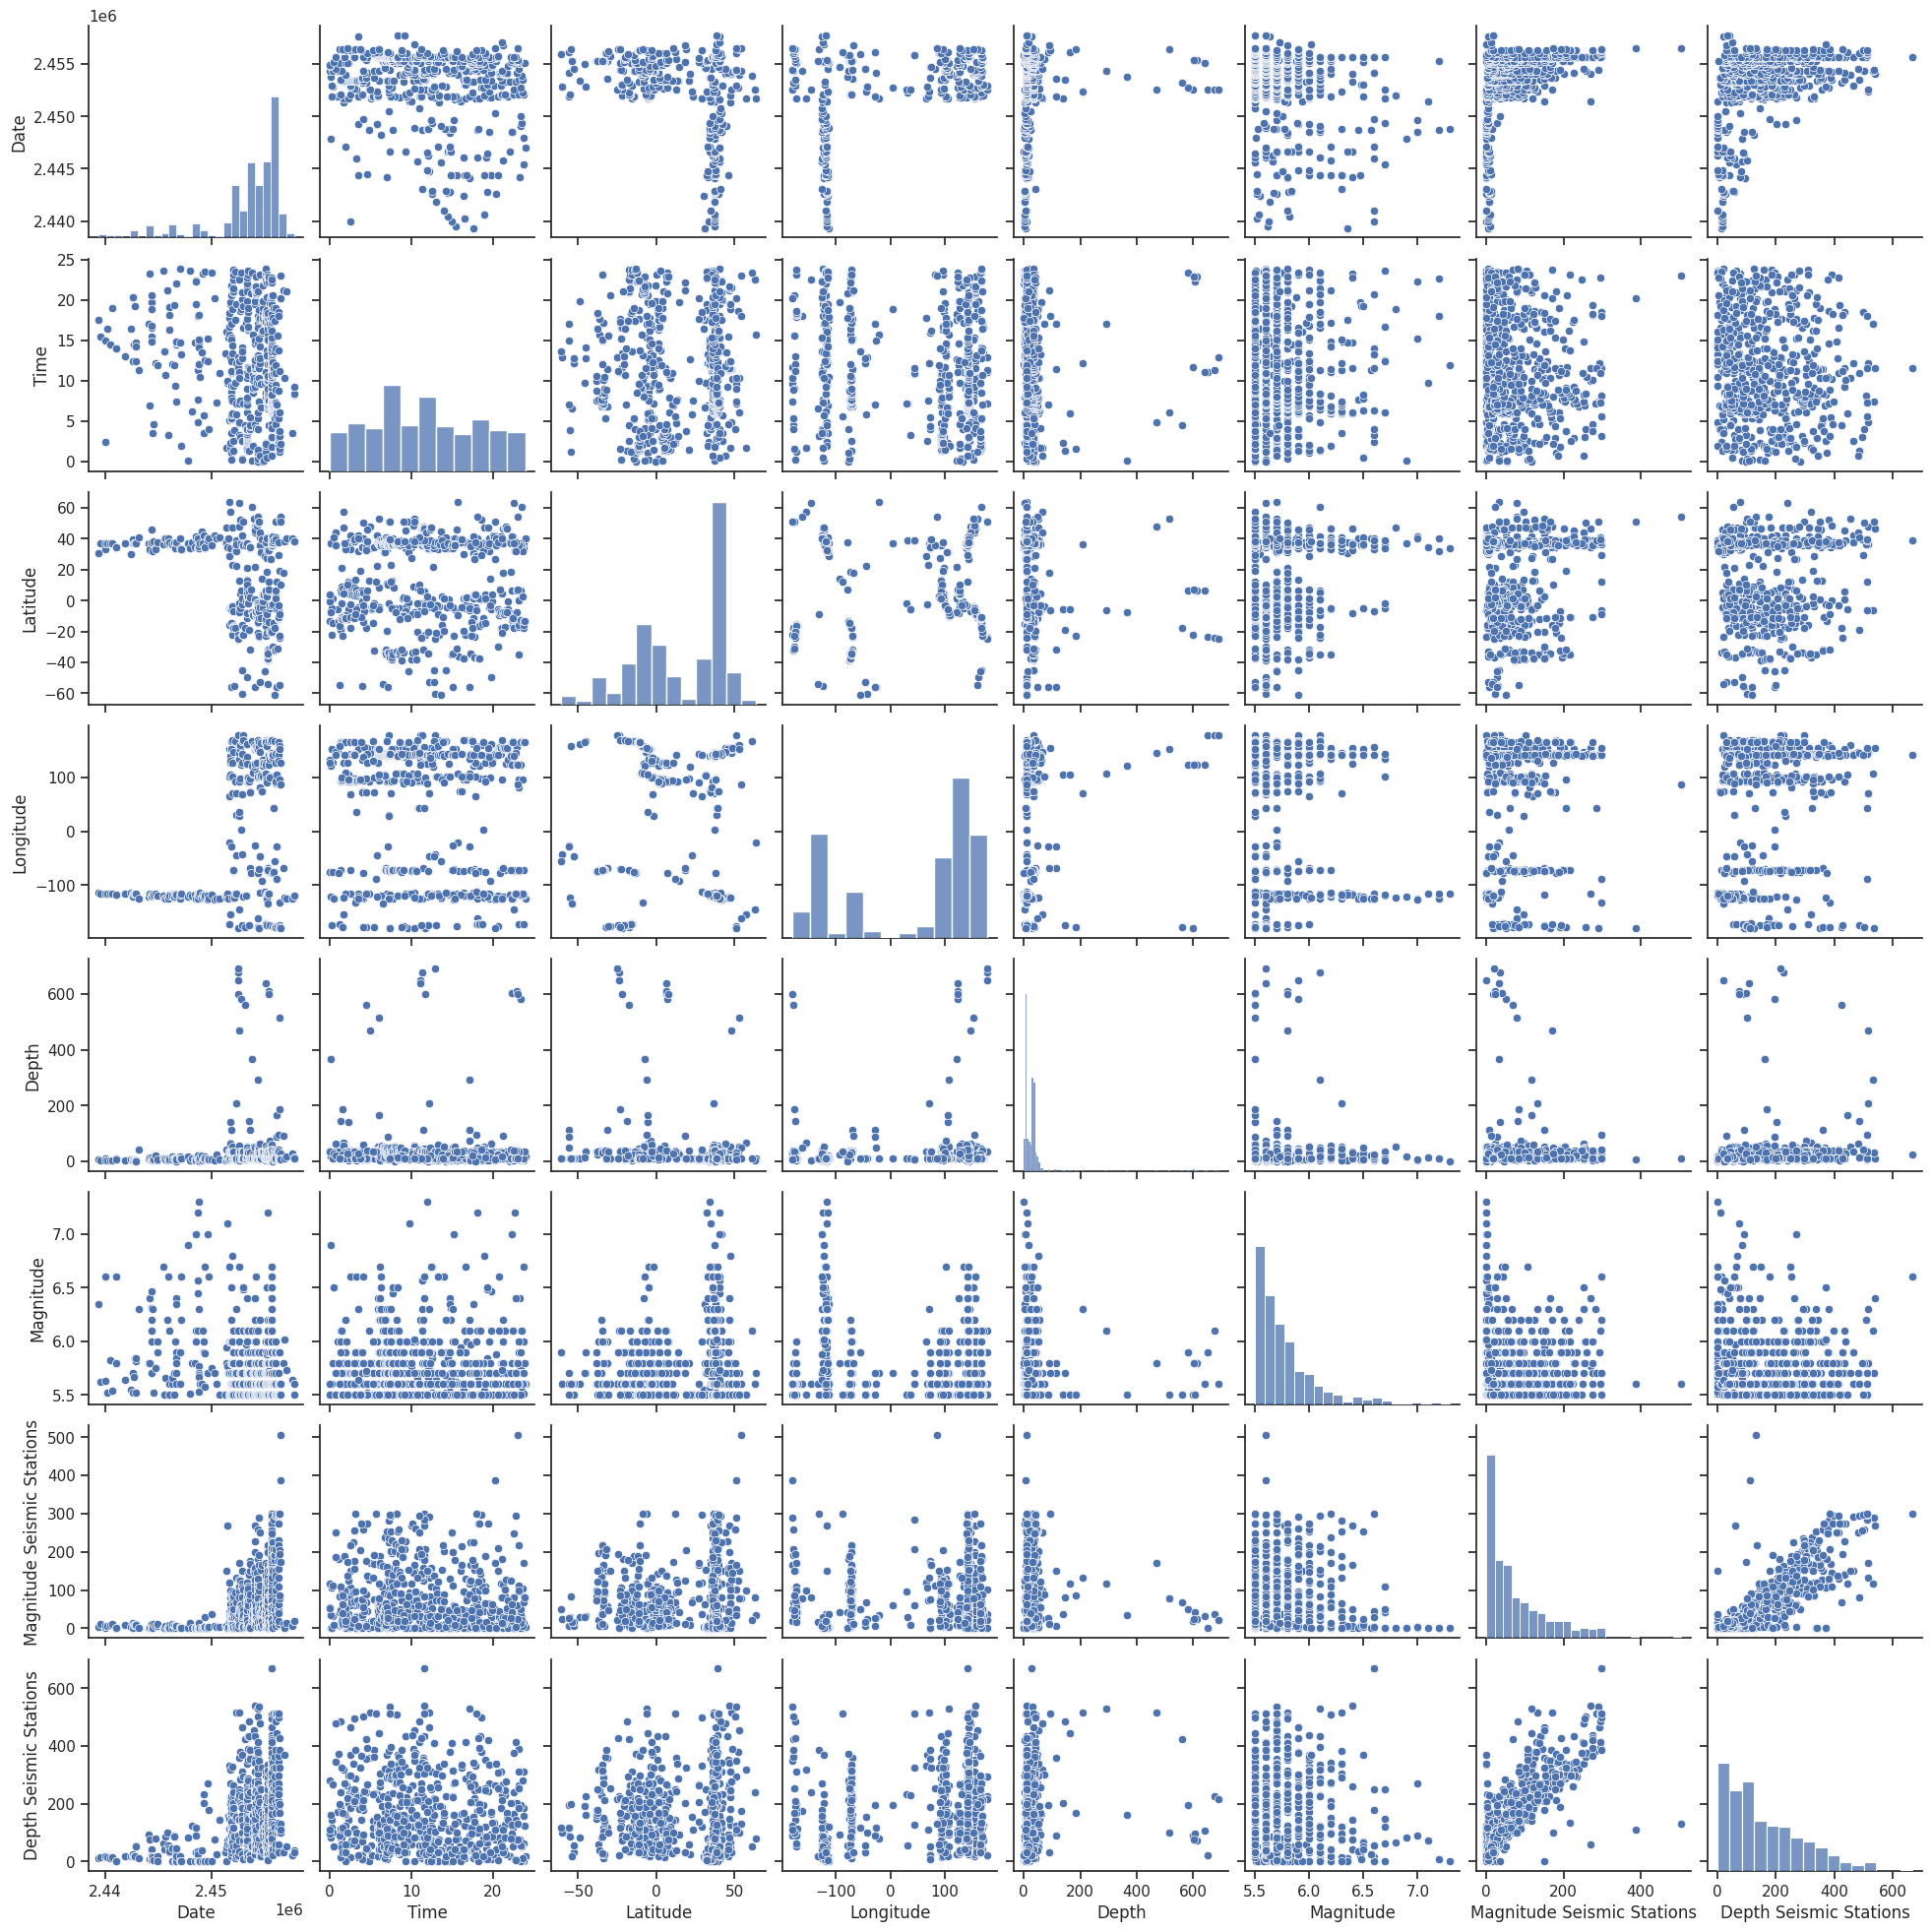

In [108]:
sns.set_theme(style="ticks")
sns.pairplot(df_filtrado, )

De acuerdo con las graficas y matrices se tiene mayores correlaciones respecto alos datos de magnitud y profundidad pero de las estaciones sismicas, esto evidenci aun proble y es que se tiene datos faltantes de estas variables.

# Normalización de los datos

$$
M_N=\frac{M-M_{min}}{M_{max}-M_{min}}
$$

In [31]:
# Crear el mapa
m = folium.Map()

# Normalizar los valores de Magnitude
df_filtrado_norma_Magnitud = (df_filtrado['Magnitude'] - df_filtrado['Magnitude'].min()) / (df_filtrado['Magnitude'].max() - df_filtrado['Magnitude'].min())

# Crear el mapa de calor
heat_data = [[lat, lon, mag] for lat, lon, mag in zip(df_filtrado['Latitude'],
                                                      df_filtrado['Longitude'],
                                                      df_filtrado_norma_Magnitud)]
heat_map = folium.plugins.HeatMap(heat_data,
                                  min_opacity=0.2,
                                  radius=8,
                                  blur=2,
                                  gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1.0: 'red'},
                                  overlay=True,
                                  control=True)
heat_map.add_to(m)

# Mostrar el mapa
m


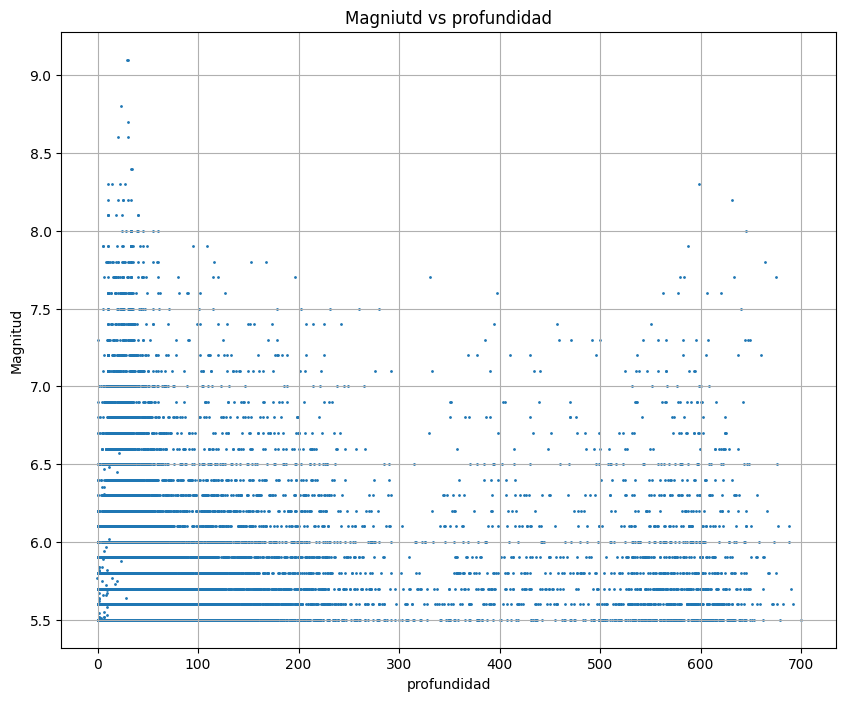

In [32]:
# hacemos un reconocimiento de los datos

figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Depth"],df_filtrado["Magnitude"],s=1)
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()

In [33]:
%matplotlib inline

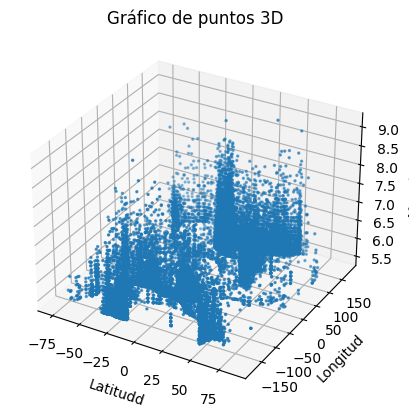

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crea arrays de NumPy para las coordenadas
x = np.array(df_filtrado["Latitude"])
y = np.array(df_filtrado["Longitude"])
z = np.array(df_filtrado["Magnitude"])

# Asegúrate de que las dimensiones coincidan
assert len(x) == len(y) == len(z)

# Crea una figura y un sub-eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos en 3D usando 'o' para marcadores circulares
ax.scatter(x, y, z, s=2)

# Personaliza el gráfico (opcional)
ax.set_xlabel('Latitudd')
ax.set_ylabel('Longitud')
ax.set_zlabel('Magnitud')
ax.set_title('Gráfico de puntos 3D')

# Muestra el gráfico
plt.show()



## hasta aqui termina el EDA


# Regresor para la magnitud

In [110]:
# elegimos los datos

X = df_filtrado[['Depth Seismic Stations']].to_numpy()

y = df_filtrado[['Magnitude Seismic Stations']].to_numpy()


In [114]:
# particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [115]:
scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [116]:
x1 = pd.DataFrame(X_train)
x1.describe()

0
count  4.260000e+02
mean  -3.315032e-16
std    1.001176e+00
min   -2.137341e+00
25%   -7.300444e-01
50%   -6.300080e-03
75%    7.592661e-01
max    2.109554e+00

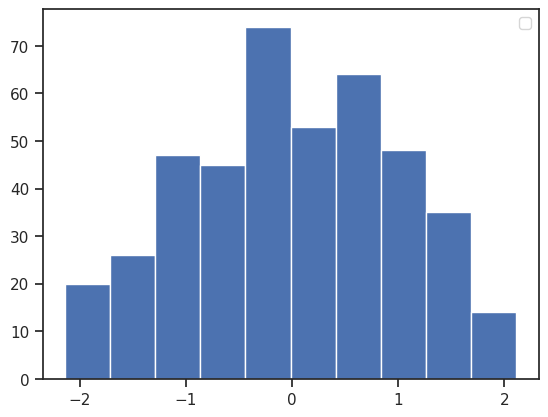

In [117]:
plt.hist(x1)
plt.legend()
plt.show()

# Ridge Regresion

La regresión Ridge es un método de regularización que se utiliza para abordar el problema de la multicolinealidad en los modelos de regresión lineal. En lugar de minimizar únicamente la suma de los cuadrados de los residuos, como en la regresión lineal estándar, la regresión Ridge también minimiza la suma de los cuadrados de los coeficientes de regresión, lo que ayuda a evitar el sobreajuste y a mejorar la estabilidad y la precisión del modelo. El objetivo de la regresión Ridge es encontrar el conjunto de coeficientes que minimiza la siguiente función de costo:

$$
L(w) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \mathbf{w})^2 + \lambda \|\mathbf{w}\|^2
$$

donde $\mathbf{w}$ es el vector de coeficientes de regresión, $\mathbf{x}_i$ es el vector de variables independientes para la observación $i$, $y_i$ es el valor de la variable dependiente para la observación $i$, y $\lambda$ es el parámetro de regularización que controla el grado de regularización aplicado a los coeficientes.

In [118]:
ridge = Ridge()
ridge.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"b={mae}, a={mse}, r^2={r2}")

b=35.133567867442245, a=2483.0683336140282, r^2=0.5968884413854411


In [119]:
param_grid = {
    'alpha' :[0.001, 0.01, 0.1, 1.0, 10.0, 20, 30, 40, 50, 100.]
}

from sklearn.model_selection import GridSearchCV

ridge_cv = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)


ridge_cv.fit(X_train, y_train)


y_predict2 = ridge_cv.predict(X_test)


mae2 = mean_absolute_error(y_test, y_predict2 )
mse2 = mean_squared_error(y_test, y_predict2 )
r22 = r2_score(y_test, y_predict2 )

print(f"b={mae2}, a={mse2}, r^2={r22}")

b=35.13080481169521, a=2486.5776132607666, r^2=0.5963187304480251


# Neural Network

La regresión con redes neuronales es un modelo de aprendizaje automático que utiliza una estructura de red neuronal para predecir una variable de salida continua a partir de datos de entrada. La red neuronal aprende a mapear las entradas a las salidas durante un proceso de entrenamiento, en el que se ajustan los parámetros (pesos y sesgos) de la red para minimizar la diferencia entre las predicciones y los valores reales.

La fórmula básica de la regresión con redes neuronales es:

$$
L(W, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \left( \sum_{l=1}^{L} \|W^{(l)}\|_F^2 \right)
$$

Donde:
- $L(W, b)$ es la función de pérdida que se desea minimizar.
- $n$ es el número de observaciones en el conjunto de datos.
- $y_i$ es el valor real de la variable de salida para la observación \(i\).
- $\hat{y}_i$ es la predicción de la red neuronal para la observación \(i\).
- $W^{(l)}$ es la matriz de pesos de la capa $l$ de la red neuronal.
- $\|W^{(l)}\|_F^2$ es la norma de Frobenius de la matriz de pesos $W^{(l)}$.
- $\lambda$ es el parámetro de regularización, que controla el grado de regularización aplicado a los pesos de la red.

Esta fórmula muestra cómo la regresión con redes neuronales minimiza el error cuadrático medio entre las predicciones y los valores reales, y también incluye un término de regularización para evitar el sobreajuste.

In [120]:
from sklearn.neural_network import MLPRegressor
MLp = MLPRegressor()

param_grid4 = {
    'hidden_layer_sizes': [(100,), (10,50,10), (20,), (100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.05],
    'solver': ['sgd', 'adam']
}



MLp_cv = GridSearchCV(MLp, param_grid4, cv=3)


MLp_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iter

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (10, 50, 10), (20,),
                                                (100, 100)],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['sgd', 'adam']})

In [121]:
y_predict8 = MLp_cv.predict(X_test)
mae8 = mean_absolute_error(y_test, y_predict8)
mse8 = mean_squared_error(y_test, y_predict8)
r28 = r2_score(y_test, y_predict8)

print(f"b={mae8}, a={mse8}, r^2={r28}")

b=26.753010335275004, a=1911.7732050268307, r^2=0.6896348497690162


# Epsilon-Support Vector Regression

La regresión Epsilon-Support Vector es un método de aprendizaje automático utilizado para la predicción de valores continuos. Aquí te presento una definición que puedes incluir en tu notebook:

"La regresión Epsilon-Support Vector (Epsilon-SVR) es una técnica de regresión basada en el marco de las máquinas de vectores de soporte (SVM). El objetivo de la Epsilon-SVR es encontrar una función que se ajuste a los datos de entrenamiento, manteniendo al mismo tiempo un margen de tolerancia definido por el parámetro epsilon (ε).

La fórmula matemática de la Epsilon-SVR es la siguiente:

$$f(x) = \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) K(x, x_i) + b$$

Donde:
- $f(x)$ es la función de predicción.
- $x_i$ son los vectores de características de entrenamiento.
- $\alpha_i$ y $\alpha_i^*$ son los multiplicadores de Lagrange que se obtienen durante el entrenamiento.
- $K(x, x_i)$ es la función kernel que define la similitud entre los vectores $x$ y $x_i$.
- $b$ es el término de sesgo.

Durante el entrenamiento, la Epsilon-SVR busca los valores de $\alpha_i$, $\alpha_i^*$ y $b$ que minimizan la siguiente función de costo:

$$L = \frac{1}{2} \|\omega\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)$$

Sujeto a las restricciones:
- $y_i - \omega^T x_i - b \leq \epsilon + \xi_i$
- $\omega^T x_i + b - y_i \leq \epsilon + \xi_i^*$
- $\xi_i, \xi_i^* \geq 0$

Donde $\xi_i$ y $\xi_i^*$ son las variables de holgura que permiten errores de predicción dentro del margen ε, y $C$ es el parámetro de regularización que controla el equilibrio entre la complejidad del modelo y el ajuste a los datos.

In [122]:
from sklearn.svm import SVR
svr = SVR(degree=3)
param_grid5 = {
    'kernel': ['linear', 'poly'],
    'degree': [2, 3, 4]
}

svr_cv = GridSearchCV(svr, param_grid5, cv=5)

svr_cv.fit(X_train, y_train)

y_predict10 = svr_cv.predict(X_test)
mae10 = mean_absolute_error(y_test, y_predict10)
mse10 = mean_squared_error(y_test, y_predict10)
r210 = r2_score(y_test, y_predict10)

print(f"b={mae10}, a={mse10}, r^2={r210}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

b=35.11198770696535, a=2953.6924768720364, r^2=0.5204853761366268


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# KNeighborsRegressor

La regresión KNeighborsRegressor (KNR) es un algoritmo de regresión basado en instancias que predice el valor de una variable objetivo continua para una nueva entrada, utilizando los valores de las K observaciones más cercanas en el espacio de características.

La fórmula matemática de la predicción de KNR para una nueva muestra $x$ es:

$$\hat{y} = \frac{1}{K} \sum_{i \in \mathcal{N}_K(x)} y_i$$

Donde:
- $\mathcal{N}_K(x)$ es el conjunto de los $K$ vecinos más cercanos de $x$ en el conjunto de entrenamiento.
- $y_i$ es el valor de la variable objetivo para el $i$-ésimo vecino más cercano.

Durante la fase de entrenamiento, KNR no aprende ningún modelo paramétrico. En su lugar, simplemente almacena los datos de entrenamiento. Cuando se solicita una predicción para una nueva muestra, KNR busca los $K$ vecinos más cercanos en el espacio de características y calcula la media de sus valores de la variable objetivo como la predicción.

Los principales hiperparámetros de KNR son:
- $K$: el número de vecinos más cercanos a considerar.
- La métrica de distancia utilizada para calcular la similitud entre las muestras (por ejemplo, distancia euclidiana, Manhattan, etc.).
- El peso asignado a cada vecino en el cálculo de la predicción (uniforme o ponderado por la distancia).

In [123]:
from sklearn.neighbors import KNeighborsRegressor

Knr = KNeighborsRegressor()

param_grid6 = {
    'n_neighbors':[2,3,4,5, 6, 7, 8, 9, 10],
    'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45]
               }

Knr_cv = GridSearchCV(Knr, param_grid6, cv=5)


Knr_cv.fit(X_train, y_train)
y_predict12 = Knr_cv.predict(X_test)

mae12 = mean_absolute_error(y_test, y_predict12)
mse12 = mean_squared_error(y_test, y_predict12)
r212 = r2_score(y_test, y_predict12)

print(f"b={mae12}, a={mse12}, r^2={r212}")

b=28.88285714285714, a=2080.747047619048, r^2=0.6622029389632028


# Random Forest Regressor

La regresión con Random Forest Regressor (RFR) es un algoritmo de aprendizaje automático basado en árboles de decisión que se utiliza para predecir valores continuos. RFR combina múltiples árboles de decisión independientes para crear un modelo de regresión más robusto y preciso.

La fórmula matemática subyacente a RFR es la siguiente:

$$\hat{y} = \frac{1}{M} \sum_{m=1}^{M} \hat{y}_m(x)$$

Donde:
- $\hat{y}$ es la predicción final del modelo RFR.
- $M$ es el número de árboles de decisión en el bosque aleatorio.
- $\hat{y}_m(x)$ es la predicción del $m$-ésimo árbol de decisión para la entrada $x$.

Durante la fase de entrenamiento, RFR construye múltiples árboles de decisión independientes, cada uno de los cuales se entrena en una muestra aleatoria del conjunto de datos original y en un subconjunto aleatorio de las características. Esto ayuda a reducir la varianza y el sesgo del modelo.

Para hacer una predicción, RFR pasa la nueva entrada a través de cada uno de los árboles de decisión y luego calcula el valor medio de las predicciones individuales de los árboles. Esta agregación de predicciones de múltiples árboles es lo que proporciona a RFR su robustez y capacidad de generalización.

Los principales hiperparámetros de RFR incluyen el número de árboles en el bosque, la profundidad máxima de los árboles y el número de características a considerar en cada división.

In [125]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=(21))

rfr.fit(X_train, y_train)
y_predict15 = rfr.predict(X_test)

mae15 = mean_absolute_error(y_test, y_predict15)
mse15 = mean_squared_error(y_test, y_predict15)
r215 = r2_score(y_test, y_predict15)

print(f"b={mae15}, a={mse15}, r^2={r215}")

<ipython-input-125-570caa80ce6e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


b=32.35822072241651, a=2959.891870543713, r^2=0.5194789409887799


# Gradient Boosting Regressor

La regresión con Gradient Boosting Regressor (GBR) es un algoritmo de aprendizaje automático basado en árboles de decisión que se utiliza para predecir valores continuos. GBR construye un modelo predictivo en forma de una serie de modelos débiles (árboles de decisión de poca profundidad) que se agregan de manera secuencial, con cada modelo nuevo corrigiendo los errores del anterior.

La fórmula matemática subyacente a GBR es la siguiente:

$$
f(x) = \sum_{m=1}^{M} \gamma_m h_m(x)
$$

Donde:
- $f(x)$ es la función de predicción final.
- $M$ es el número de árboles de decisión en el modelo GBR.
- $\gamma_m$ es el factor de aprendizaje (learning rate) que pondера la contribución del $m$-ésimo árbol.
- $h_m(x)$ es la predicción del $m$-ésimo árbol de decisión para la entrada $x$.

Durante el entrenamiento, GBR aplica de forma iterativa el siguiente proceso:
1. Inicializar el modelo con una predicción constante.
2. Para cada iteración $m = 1 \dots M$:
   - Entrenar un árbol de decisión $h_m(x)$ que minimice los residuos del modelo actual.
   - Actualizar el modelo sumando el nuevo árbol ponderado por $\gamma_m$.

Esta construcción iterativa y aditiva de modelos débiles permite que GBR capture incluso relaciones complejas y no lineales entre las variables de entrada y la variable objetivo.

In [126]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_predict16 = gbr.predict(X_test)


mae16 = mean_absolute_error(y_test, y_predict16)
mse16 = mean_squared_error(y_test, y_predict16)
r216 = r2_score(y_test, y_predict16)


print(f"b={mae16}, a={mse16}, r^2={r216}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


b=29.93223119778869, a=2556.8551824238907, r^2=0.584909579899294


# Stacking

El stacking de modelos de regresión es una técnica de aprendizaje automático que consiste en combinar las predicciones de varios modelos de regresión diferentes para obtener un modelo final más preciso y robusto. El objetivo es aprovechar las fortalezas de cada modelo individual y mitigar sus debilidades.

La idea detrás del stacking es entrenar un modelo de aprendizaje de segundo nivel (también conocido como modelo meta-regressor) que tome las predicciones de los modelos de regresión base como entradas y genere la predicción final. Este modelo de segundo nivel aprende a combinar de manera óptima las predicciones individuales.

In [127]:
from sklearn.ensemble import StackingRegressor


estimators = [

    ('rfr', rfr),
    ('knr',Knr_cv.best_estimator_),
    ('mpl', MLp_cv.best_estimator_),
    ('gbr', gbr),
    ('svr', svr_cv.best_estimator_)

]



sr = StackingRegressor(
    estimators= estimators,


)


sr.fit(X_train, y_train)


y_predict17 = sr.predict(X_test)

mae17 = mean_absolute_error(y_test, y_predict17)
mse17 = mean_squared_error(y_test, y_predict17)
r217 = r2_score(y_test, y_predict17)


print(f"b={mae17}, a={mse17}, r^2={r217}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


b=26.556836655291054, a=1928.1518671527472, r^2=0.6869758701798441


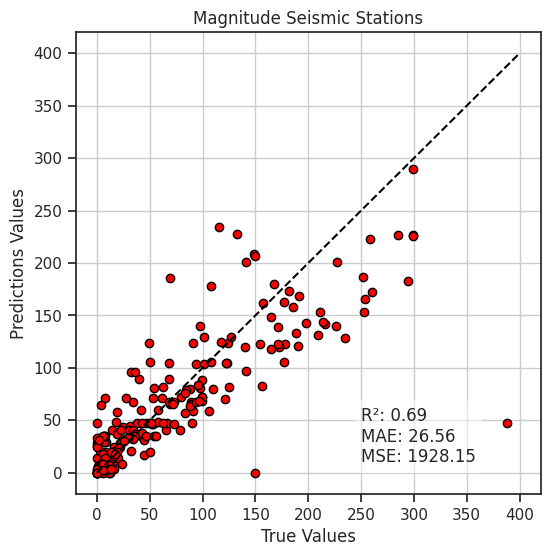

In [128]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict17, color='red', edgecolor='black', label='Datos Predichos vs Reales')
plt.plot([0, 400], [0, 400], color='black', linestyle='--', label='Línea de Referencia')
plt.title('Magnitude Seismic Stations')
plt.xlabel('True Values')
plt.ylabel('Predictions Values')

# Añadir las métricas en una caja de texto
metrics_text = f'R²: {r217:.2f}\nMAE: {mae17:.2f}\nMSE: {mse17:.2f}'
plt.text(250, 10, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.grid(True)
plt.show()

#Modelos de K-Means (sin estandarizar)

In [35]:
X = np.zeros((df_filtrado.shape[0], 2))
X[:, 0], X[:, 1]= df_filtrado["Depth"],df_filtrado["Magnitude"]
X

array([[131.6 ,   6.  ],
       [ 80.  ,   5.8 ],
       [ 20.  ,   6.2 ],
       ...,
       [ 10.  ,   5.9 ],
       [ 79.  ,   6.3 ],
       [ 11.94,   5.5 ]])

In [36]:
# prompt: haz un modelo de K-means con 5 Clusters con la matrix X en el cual los centroides colocalos en el centro de cada placa continental el modelo tiene que identificar las placas continental con los sismos que han ocurrido y grafica la longitud vs la latitud con los respectivos centroides y sus diferentes colores de para saber a que cluster pertenece

from sklearn.cluster import KMeans

# mal inicializado el modelo
"""
initial_centroids = [
    [-60.0, -30.0],  # Coordenadas del centro de la primera placa
    [20.0, 10.0],    # Coordenadas del centro de la segunda placa
    [80.0, 40.0],    # Coordenadas del centro de la tercera placa
    [140.0, -10.0],  # Coordenadas del centro de la cuarta placa
    [-140.0, 60.0]   # Coordenadas del centro de la quinta placa
]
"""


initial_centroids = [
    [600, 7.5],  # Coordenadas del centro de la primera placa
    [20.0, 10.0]# Coordenadas del centro de la segunda placa
]

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2, init=np.array(initial_centroids), n_init=1)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_


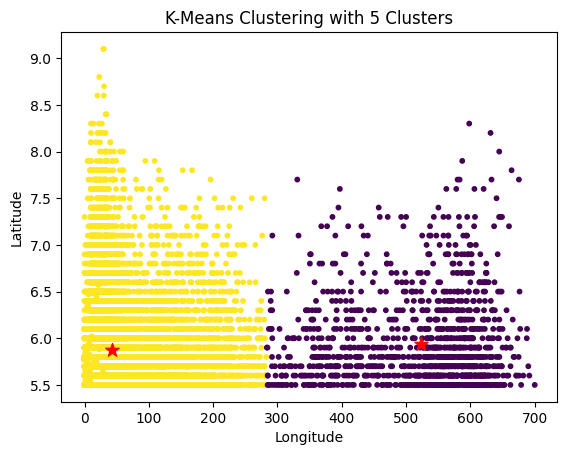

In [37]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=labels, s=10)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='red')

# Set the labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('K-Means Clustering with 5 Clusters')

# Show the plot
plt.show()

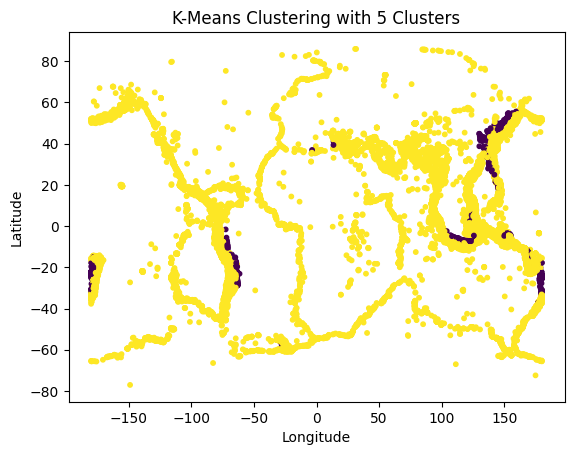

In [38]:
# Create a figure and axes
fig, ax = plt.subplots()
# Plot the data points
ax.scatter(df_filtrado["Longitude"], df_filtrado["Latitude"], c=labels, s=10)

# Set the labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('K-Means Clustering with 5 Clusters')

# Show the plot
plt.show()

# Modelo de DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Agrupamiento espacial basado en la densidad de aplicaciones con ruido (en español)

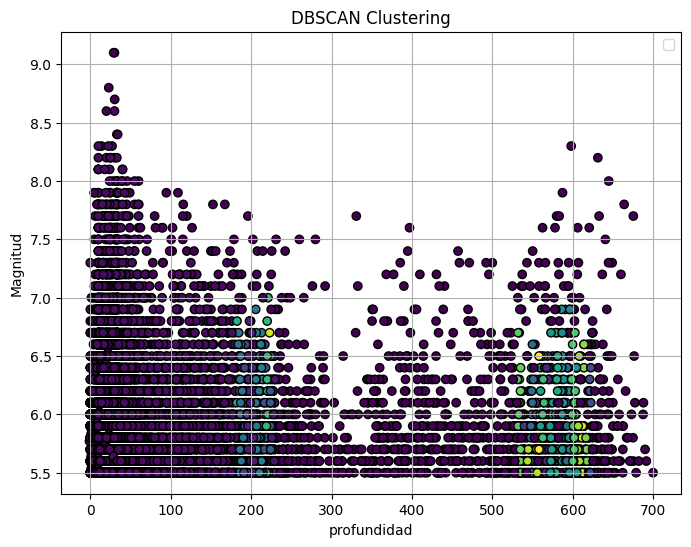

In [39]:
# Inicializar DBSCAN con los parámetros eps y min_samples
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)

# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_

# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('profundidad')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34])

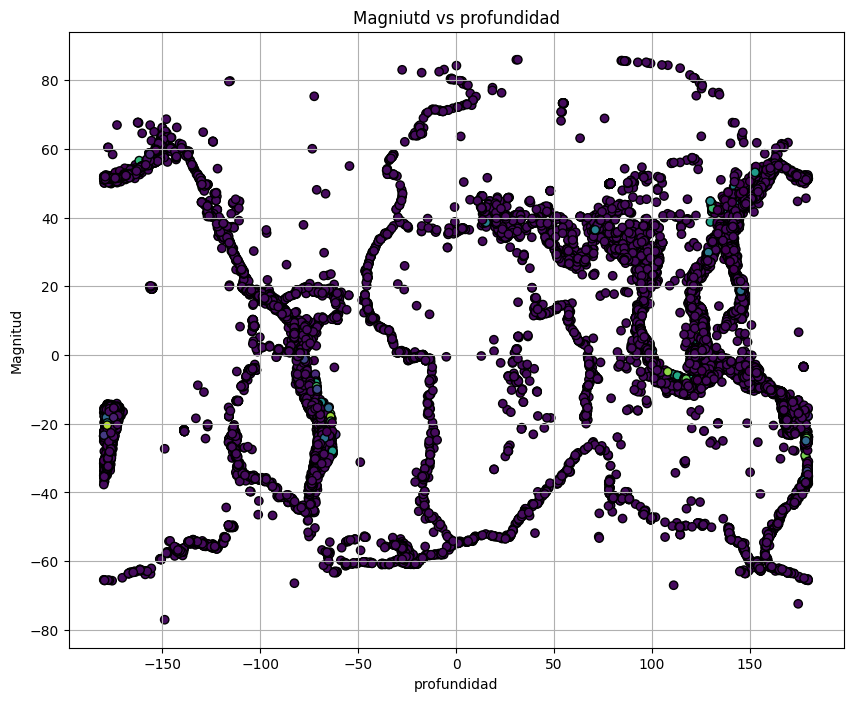

In [41]:
figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Longitude"],df_filtrado["Latitude"],c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler


# Separa las variables numéricas
columnas_numericas = ["Date","Latitude","Longitude","Time","Depth","Magnitude"]

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Estandariza las variables numéricas
data_escalado = scaler.fit_transform(df_filtrado[columnas_numericas])

# Crea un nuevo DataFrame con las variables escaladas
data_escalado_df = pd.DataFrame(data_escalado, columns=columnas_numericas)
data_escalado_df["Magnitude"] = df_filtrado["Magnitude"]

In [43]:
# para saber si hay datos nulos
print(np.count_nonzero(np.isnan(df_filtrado["Magnitude"])))
print(np.count_nonzero(np.isnan(data_escalado_df["Magnitude"])))

0
0


In [44]:
X_stand = np.zeros((df_filtrado.shape[0], 4))
X_stand[:, 0], X_stand[:, 1], X_stand[:, 2], X_stand[:, 3]= data_escalado_df["Depth"],data_escalado_df["Magnitude"],data_escalado_df["Latitude"],data_escalado_df["Longitude"]
X_stand

array([[ 4.96328884e-01,  6.00000000e+00,  5.83382307e-01,
         8.44374289e-01],
       [ 7.54587128e-02,  5.80000000e+00,  6.11824568e-03,
         6.98858554e-01],
       [-4.13925208e-01,  6.20000000e+00, -7.39147822e-01,
        -1.70189612e+00],
       ...,
       [-4.95489195e-01,  5.90000000e+00,  1.17024032e+00,
         8.03025321e-01],
       [ 6.73023141e-02,  6.30000000e+00, -3.55565932e-01,
         6.29637395e-01],
       [-4.79665781e-01,  5.50000000e+00,  1.18616049e+00,
         8.10865993e-01]])

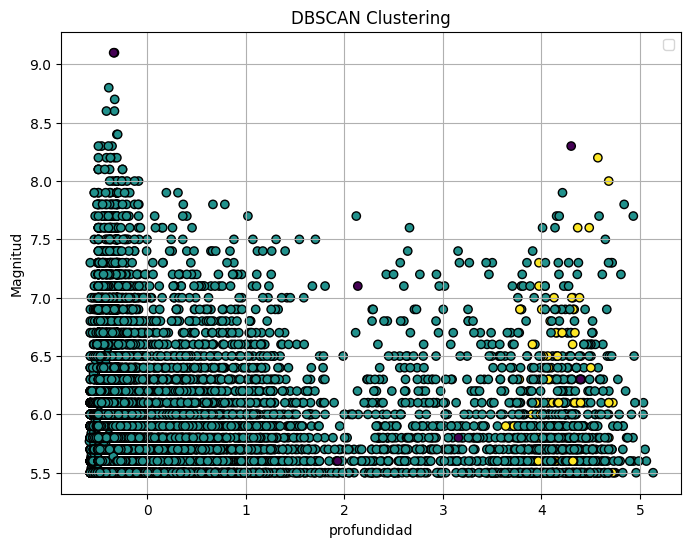

In [45]:
# Inicializar DBSCAN con los parámetros eps y min_samples
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)

# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X_stand)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_

# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_stand[:, 0], X_stand[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('profundidad')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()


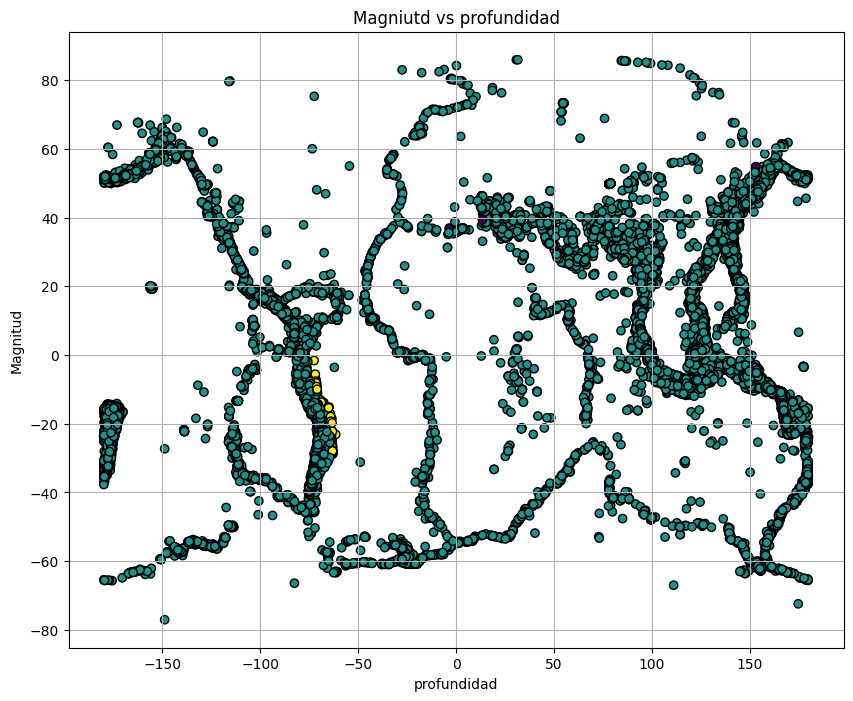

In [46]:
figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Longitude"],df_filtrado["Latitude"],c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()

# Nuevo dataset

se importa nuevo dataset con el fin de sacar la información de metodos no supervisado como k-means y metodos supervisados como un regresor con las nuevas variables

#Modelos de K-Means (al nuevo dataset)

In [47]:
# cargar el nuevo dataset
df_plus=pd.read_excel("Sismos_global+.xlsx")

In [48]:
# información de los datos
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               23412 non-null  int64  
 1   Latitud          23412 non-null  float64
 2   Longitud         23412 non-null  float64
 3   Magnitud         23412 non-null  float64
 4   Profundidad      23412 non-null  float64
 5   Placa            23412 non-null  object 
 6   T_Falla          23412 non-null  object 
 7   Distancia_Falla  23412 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [49]:
#Vista Preliminar
df_plus.head()

ID  Latitud  Longitud  Magnitud  Profundidad               Placa T_Falla  \
0   1   19.246   145.616       6.0        131.6      Placa Filipina  TRENCH   
1   2    1.863   127.352       5.8         80.0    Placa Indo-China  TRENCH   
2   3  -20.579  -173.972       6.2         20.0  Placa del Pacifico  TRENCH   
3   4  -59.076   -23.557       5.8         15.0  Placa Sudamericana  TRENCH   
4   5   11.938   126.427       5.8         15.0      Placa Filipina  TRENCH   

   Distancia_Falla  
0           129469  
1            68333  
2           678719  
3            32355  
4            24123

In [50]:
#Resumen estadistico preliminar
df_plus.describe()

ID       Latitud      Longitud      Magnitud   Profundidad  \
count  23412.000000  23412.000000  23412.000000  23412.000000  23412.000000   
mean   11706.500000      1.679033     39.639961      5.882531     70.767911   
std     6758.606587     30.113183    125.511959      0.423066    122.651898   
min        1.000000    -77.080000   -179.997000      5.500000     -1.100000   
25%     5853.750000    -18.653000    -76.349750      5.600000     14.522500   
50%    11706.500000     -3.568500    103.982000      5.700000     33.000000   
75%    17559.250000     26.190750    145.026250      6.000000     54.000000   
max    23412.000000     86.005000    179.998000      9.100000    700.000000   

       Distancia_Falla  
count     2.341200e+04  
mean      2.483560e+05  
std       4.252850e+05  
min       4.000000e+00  
25%       4.171600e+04  
50%       9.790300e+04  
75%       2.158692e+05  
max       3.595006e+06

In [51]:
# para ver que tipo de variable es
info = df_plus.dtypes
res = dict((key, "numérica") if value == "float64" else (key, "categórica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

columna        tipo
0               ID  categórica
1          Latitud    numérica
2         Longitud    numérica
3         Magnitud    numérica
4      Profundidad    numérica
5            Placa  categórica
6          T_Falla  categórica
7  Distancia_Falla  categórica

In [52]:
# tamaño del dataset
print(df_plus.shape)

(23412, 8)


In [53]:
# diccionario de categorización de fallas
Typefault= {
    'RIDGE':1,
    'TRANSFORM FAULT':2,
    'TRENCH':3
}


Plate = {
    'Placa Antartica':	1,
    'Placa Sudamericana':	2,
    'Placa de Nazca':	3,
    'Placa del Caribe':	4,
    'Placa de Cocos':	5,
    'Placa Norteamericana':	6,
    'Placa del Pacifico':	7,
    'Placa de Ojotsk':	8,
    'Placa de Amur':	9,
    'Placa Filipina':	10,
    'Placa Euroasiatica':	11,
    'Placa Indo-China':	12,
    'Placa Indo-Australian':	13,
    'Placa Arabiga':	14,
    'Placa Somali':	15,
    'Placa Africana':	16,

}

df_plus['Distancia_Falla'] = df_plus['Distancia_Falla']/1000

In [54]:
df_plus['FallaID'] = df_plus['T_Falla'].map(Typefault)
df_plus['PlacaID'] = df_plus['Placa'].map(Plate)

# filtrar datos
df_plus3 = df_plus[(df_plus['Profundidad'] >= 80) & (df_plus['Profundidad'] <= 300) & (df_plus['Distancia_Falla'] <= 500)]

# Metodo Codo

In [55]:
# para ver que tipo de variable es
info = df_plus3.dtypes
res = dict((key, "numerica") if (value == "float64" or value=="int64") else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

columna        tipo
0               ID    numerica
1          Latitud    numerica
2         Longitud    numerica
3         Magnitud    numerica
4      Profundidad    numerica
5            Placa  categorica
6          T_Falla  categorica
7  Distancia_Falla    numerica
8          FallaID    numerica
9          PlacaID    numerica

In [56]:
# eliminamos los datos categoricos

df_plus3 = df_plus3.select_dtypes(include='number')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

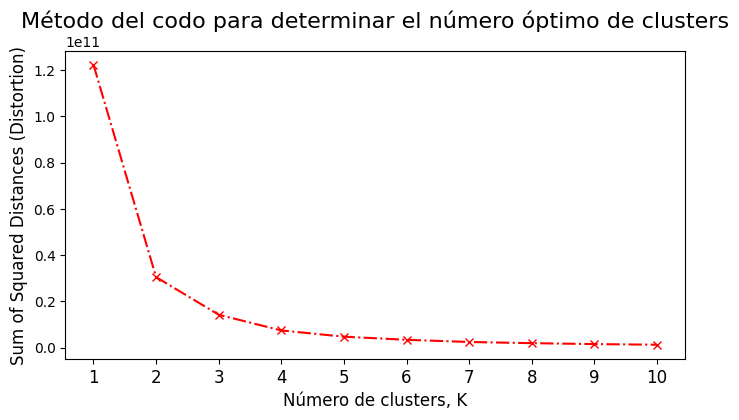

In [57]:
# Lista para almacenar la inercia
sum_sq_d = []

# Calcular K-means para una gama de valores de K
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_plus3)
    sum_sq_d.append(kmeans.inertia_)

# Graficar la inercia contra el número de clusters K
plt.figure(figsize=(8, 4))
plt.plot(K_range, sum_sq_d, 'rx-.')
plt.xlabel('Número de clusters, K', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances (Distortion)', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Método del codo para determinar el número óptimo de clusters', fontsize=16)
plt.show()

El número óptimo de clusters es: 3


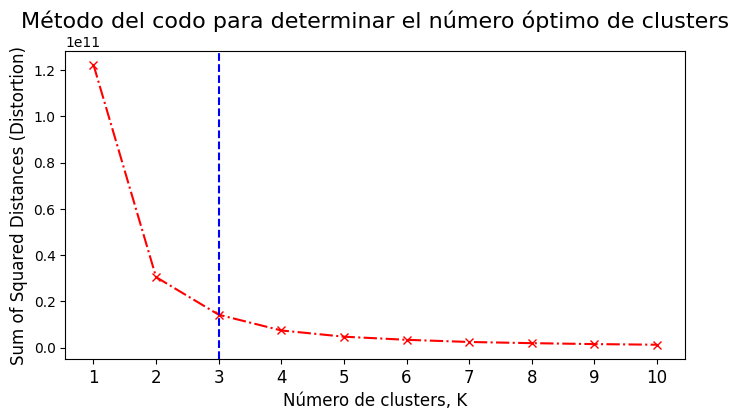

In [58]:
# Usar KneeLocator para encontrar el codo
kl = KneeLocator(K_range, sum_sq_d, curve="convex", direction="decreasing")
print(f'El número óptimo de clusters es: {kl.elbow}')

# Graficar con el punto del codo marcado
plt.figure(figsize=(8, 4))
plt.plot(K_range, sum_sq_d, 'rx-.')
plt.axvline(kl.elbow, linestyle='--', color='b')
plt.xlabel('Número de clusters, K', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances (Distortion)', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Método del codo para determinar el número óptimo de clusters', fontsize=16)
plt.show()

In [59]:
X = np.zeros((df_plus3.shape[0], 5))
X[:, 0], X[:, 1], X[:, 2], X[:, 3],X[:, 4] = df_plus3["Profundidad"],df_plus3["Magnitud"],df_plus3["Distancia_Falla"],df_plus3["FallaID"],df_plus3["PlacaID"]
X

array([[131.6  ,   6.   , 129.469,   3.   ,  10.   ],
       [ 80.   ,   5.8  ,  68.333,   3.   ,  12.   ],
       [ 95.   ,   6.   , 119.976,   3.   ,   1.   ],
       ...,
       [ 94.54 ,   7.9  ,  66.172,   2.   ,   7.   ],
       [ 83.36 ,   5.6  ,  74.048,   2.   ,   7.   ],
       [152.   ,   6.7  , 171.917,   3.   ,  13.   ]])

In [60]:
# prompt: haz un modelo de K-means con 5 Clusters con la matrix X en el cual los centroides colocalos en el centro de cada placa continental el modelo tiene que identificar las placas continental con los sismos que han ocurrido y grafica la longitud vs la latitud con los respectivos centroides y sus diferentes colores de para saber a que cluster pertenece

from sklearn.cluster import KMeans
import random as rd

# inicializar los centroides
# mal inicializado el modelo

N=3

initial_centroids = [ X[rd.randint(0,df_plus3.shape[0]),:] for _ in range(N)]

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=N, init=np.array(initial_centroids), n_init=1)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_


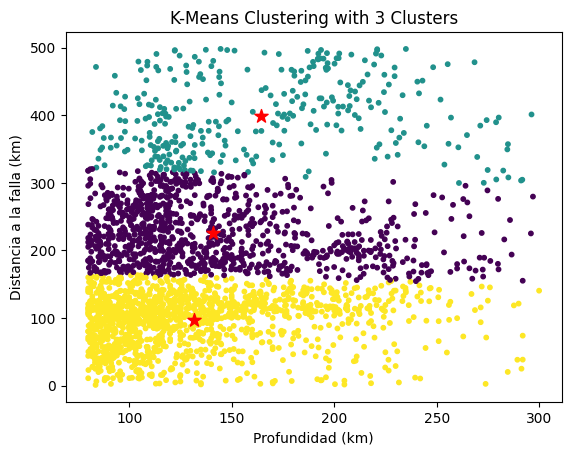

In [61]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(X[:, 0], X[:, 2], c=labels, s=10)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 2], marker='*', s=100, c='red')

# Set the labels and title
ax.set_xlabel('Profundidad (km)')
ax.set_ylabel('Distancia a la falla (km)')
ax.set_title(f'K-Means Clustering with {N} Clusters')

# Show the plot
plt.show()

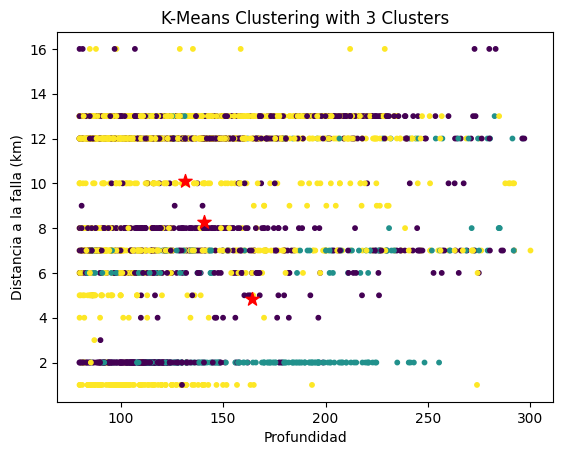

In [62]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(X[:, 0], X[:, 4], c=labels, s=10)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 4], marker='*', s=100, c='red')

# Set the labels and title
ax.set_xlabel('Profundidad')
ax.set_ylabel('Distancia a la falla (km)')
ax.set_title(f'K-Means Clustering with {N} Clusters')

# Show the plot
plt.show()

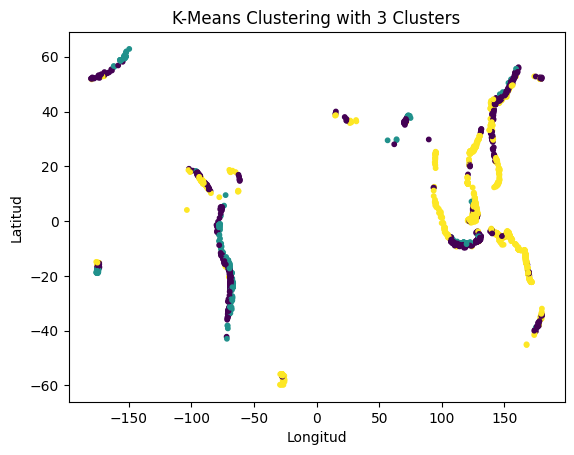

In [63]:
# Create a figure and axes
fig, ax = plt.subplots()
# Plot the data points
ax.scatter(df_plus3["Longitud"], df_plus3["Latitud"], c=labels, s=10)

# Set the labels and title
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title(f'K-Means Clustering with {N} Clusters')

# Show the plot
plt.show()